In [98]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
from sklearn.externals import joblib

set_matplotlib_formats('svg')
sns.set_style('whitegrid')

In [99]:
Data = pd.read_csv('../data/processed/Data.csv')


In [100]:
Data

,Unnamed: 0,Unnamed: 0.1,Basal Rate (U/h),BWZ Estimate (U),BWZ Carb Ratio (U/Ex),BWZ Insulin Sensitivity (mg/dL/U),BWZ Carb Input (exchanges),BWZ BG Input (mg/dL),BWZ Correction Estimate (U),BWZ Food Estimate (U),BWZ Active Insulin (U),BWZ Unabsorbed Insulin Total (U),day_of_month,day_of_week,month_of_year,hour
0,0,16,1.95,9.5,1.0,45.0,9.5,84.0,0.0,9.5,0.0,0.0,25,2,3,22
1,1,60,1.60,6.6,1.9,45.0,3.5,111.0,0.0,6.6,0.0,0.0,25,2,3,8
2,2,82,1.95,5.5,1.0,45.0,5.5,99.0,0.0,5.5,0.0,0.0,24,1,3,22
3,3,103,2.70,4.4,1.1,45.0,4.0,97.0,0.0,4.4,1.2,0.0,24,1,3,18
4,4,118,2.20,11.2,1.5,45.0,7.5,75.0,0.0,11.2,0.0,0.0,24,1,3,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033,4033,38847,0.60,5.8,1.0,50.0,5.5,139.0,0.3,5.5,0.0,0.0,17,1,11,21
4034,4034,38861,0.55,4.0,1.0,50.0,4.0,80.0,0.0,4.0,1.0,0.0,17,1,11,17
4035,4035,38868,0.40,9.5,1.0,50.0,9.5,126.0,0.1,9.5,1.3,0.1,17,1,11,14
4036,4036,38873,0.40,3.0,1.0,50.0,3.0,103.0,0.0,3.0,0.0,0.0,17,1,11,12


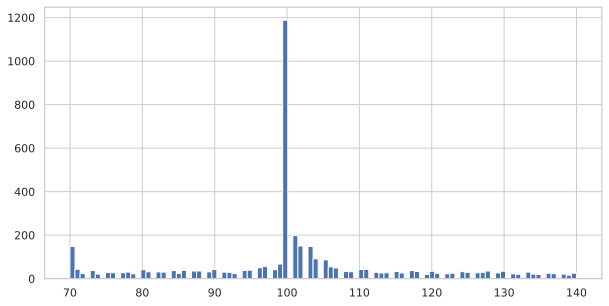

In [101]:
# Plot datos con filtro, eliminadas las lecturas bjas y altas de glucosa en sangre
Data['BWZ BG Input (mg/dL)'].hist(figsize=(10, 5), bins=100);

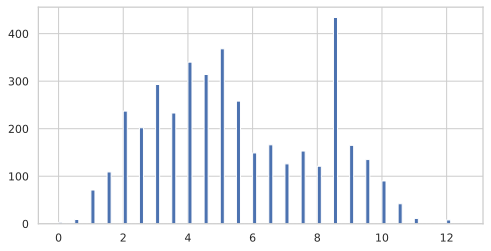

In [102]:
#Carbohidrados tomados por raciones
Data['BWZ Carb Input (exchanges)'].hist(figsize=(8, 4), bins=100);

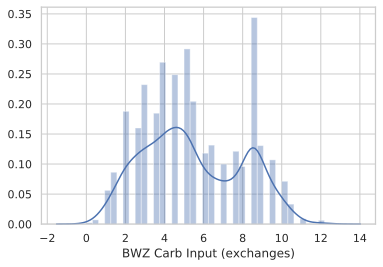

In [103]:
sns.distplot(Data['BWZ Carb Input (exchanges)'], bins=40);

In [104]:
# Ordenado por hora para visualización
Data['hour'] = Data['hour'].astype(int)
by_hour = Data.sort_values('hour')
by_hour_mean = by_hour.groupby(['hour']).mean()


by_day_of_week = Data.sort_values('hour')
by_day_of_week_mean = by_day_of_week.groupby(['day_of_week']).mean()


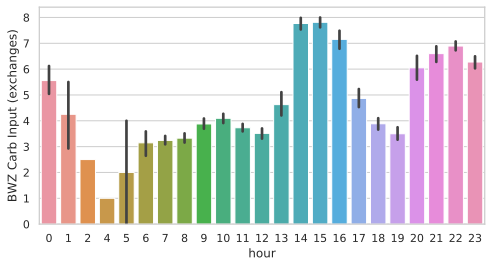

In [105]:

sns.set(style="whitegrid") # Estilo trazado

fig = plt.figure(figsize=(8, 4))
ax = sns.barplot(x='hour', y='BWZ Carb Input (exchanges)', data= by_hour)

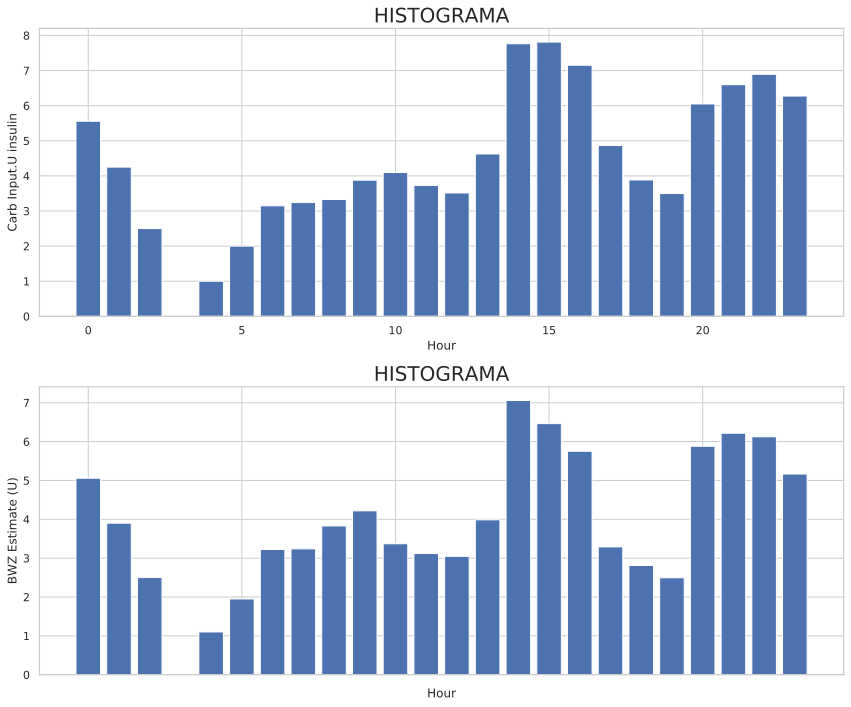

In [106]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 10), nrows=2, ncols=1)



ax1.bar(by_hour_mean.index, by_hour_mean['BWZ Carb Input (exchanges)'])
labels = ax1.get_xticklabels()
ax1.set_xlabel('Hour')
ax1.set_ylabel('Carb Input.U insulin')
ax1.set_title(r'HISTOGRAMA', fontsize=20)



ax2.bar(by_hour_mean.index, by_hour_mean['BWZ Estimate (U)'])
ax2.set_xticklabels(ax.get_xticklabels(all),rotation=45)
ax2.set_xlabel('Hour')
ax2.set_ylabel('BWZ Estimate (U)')
ax2.set_title(r'HISTOGRAMA', fontsize=20)

plt.tight_layout()
plt.show()


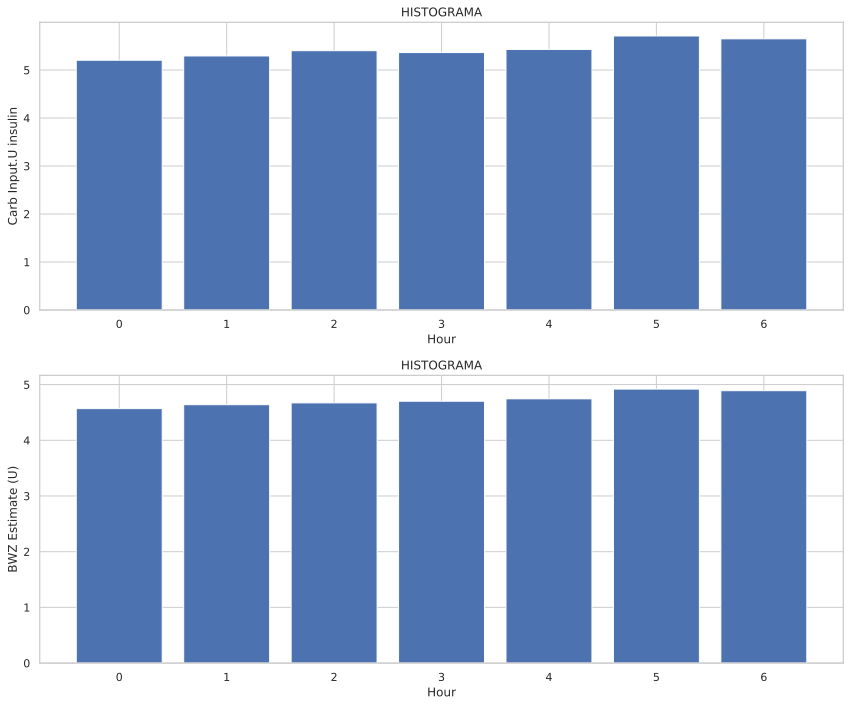

In [107]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 10), nrows=2, ncols=1)



ax1.bar(by_day_of_week_mean.index, by_day_of_week_mean['BWZ Carb Input (exchanges)'])
labels = ax1.get_xticklabels()
ax1.set_xlabel('Hour')
ax1.set_ylabel('Carb Input.U insulin')
ax1.set_title(r'HISTOGRAMA')



ax2.bar(by_day_of_week_mean.index, by_day_of_week_mean['BWZ Estimate (U)'])
#labels = ax.get_xticklabels()
ax2.set_xlabel('Hour')
ax2.set_ylabel('BWZ Estimate (U)')
ax2.set_title(r'HISTOGRAMA')

plt.tight_layout()
plt.show()


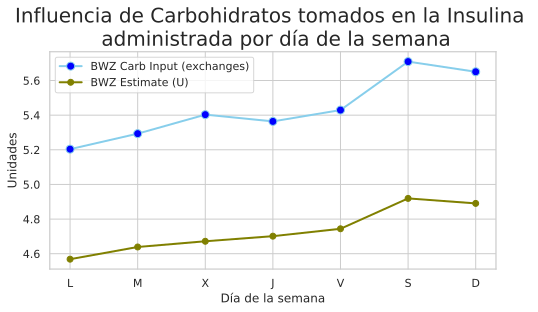

In [111]:
# Visualización de los carbohiddratos a comer y la insulina a administrar según el día de la semana
day_of_week = ['L','M','X', 'J','V','S','D']
plt.subplots(figsize=(8, 4))
plt.plot( day_of_week, 'BWZ Carb Input (exchanges)', data=by_day_of_week_mean, marker='o', 
         markerfacecolor='blue', markersize=8, color='skyblue', linewidth=2)
plt.plot( day_of_week, 'BWZ Estimate (U)', data=by_day_of_week_mean, marker='o', color='olive', linewidth=2)
plt.title('Influencia de Carbohidratos tomados en la Insulina \n administrada por día de la semana', fontsize = 20)
plt.xlabel('Día de la semana')
plt.ylabel('Unidades')

plt.legend()


Text(0.5, 1.0, 'HISTOGRAMA')

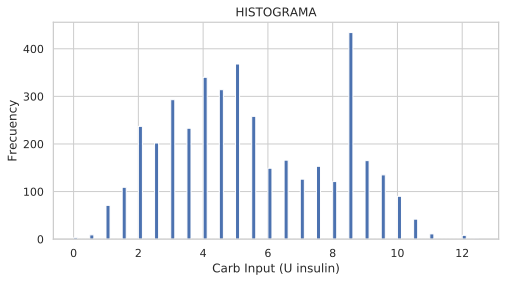

In [112]:
fig, ax = plt.subplots(figsize=(8, 4))

ax = Data['BWZ Carb Input (exchanges)'].hist(bins=100);

ax.set_xlabel('Carb Input (U insulin)')
ax.set_ylabel('Frecuency')
ax.set_title(r'HISTOGRAMA')

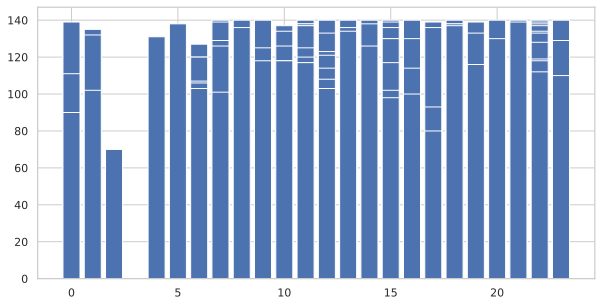

In [113]:

fig, ax = plt.subplots(figsize =(10,5))
#ax.plot(bins =100, '--')
ax.bar(Data['hour'],Data['BWZ BG Input (mg/dL)'])
#labels = ax.get_xticklabels()
plt.setp(labels, rotation=45);
plt.show()


#ax.set_xlabel('Smarts')
#ax.set_ylabel('Probability density')
#ax.set_title(r'Histogram prueba')

In [114]:
Data['BWZ BG Input (mg/dL)'].value_counts()

100.0    1188
101.0     198
102.0     150
103.0     148
70.0      148
         ... 
74.0       21
132.0      20
119.0      19
135.0      19
139.0      16
Name: BWZ BG Input (mg/dL), Length: 71, dtype: int64

In [ ]:
model_pickle = joblib.load('../data/results/model.pkl')
new_food = pd.read_csv('../data/results/New_data.csv')
new_food


In [ ]:
new_food.to_dict()

In [ ]:
new_food_dict = {'Unnamed: 0': {0: 0},
                 'Unnamed: 0.1': {0: 16},
                 'Basal Rate (U/h)': {0: 2.2},
                 'BWZ Estimate (U)': {0: 9.5},
                 'BWZ Carb Ratio (U/Ex)': {0: 1.5},
                 'BWZ Insulin Sensitivity (mg/dL/U)': {0: 50.0},
                 'BWZ Carb Input (exchanges)': {0: 9.5},
                 'BWZ BG Input (mg/dL)': {0: 84.0},
                 'BWZ Correction Estimate (U)': {0: 0.2},
                 'BWZ Food Estimate (U)': {0: input()},
                 'BWZ Active Insulin (U)': {0: 0.1},
                 'BWZ Unabsorbed Insulin Total (U)': {0: 0.5},
                 'day_of_month': {0: 25},
                 'day_of_week': {0: 2},
                 'month_of_year': {0: 3},
                 'hour': {0: 10}}


In [ ]:
new_food_dict

In [92]:
administrar_insulina = model_pickle.predict(new_food)
pd.DataFrame(administrar_insulina).to_csv('../data/results/administrar_insulina.csv')
print(f'Te debes administrar ' + 
      pd.DataFrame(administrar_insulina).iloc[0, 0].round(2).astype(str) 
      + ' unidades de insulina')

Te debes administrar 14.34 unidades de insulina


/home/emilio/miniconda3/envs/test_env/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
